In [1]:
# https://towardsdatascience.com/image-segmentation-using-pythons-scikit-image-module-533a61ecc980

In [2]:
from PIL import Image

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage import io


In [61]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

In [62]:
# Supervised thresholding

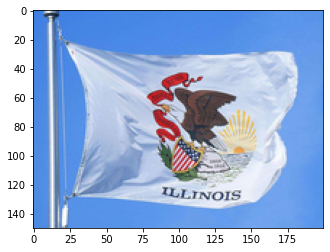

In [63]:
image = Image.open("Illinois_1.png")
image = image.resize((200,150),Image.ANTIALIAS)
# image.save(fp="newimage.png")
image = np.array(image)
plt.imshow(image);

In [64]:
image_gray = color.rgb2gray(image) 
# image_show(image_gray);

In [65]:
# Additive coutour segementation

In [66]:
def rectangle_points(x,y,width, height, resolution):
    points = []

    for i in np.linspace(y, y + height, resolution):
        points.append([x, i])    
    y1 = i

    for i in np.linspace(x, x + width, resolution):
        points.append([i, y1])
    x1 = i

    for i in np.linspace(y + height, y, resolution):
        points.append([x1, i])
    y1 = i

    for i in np.linspace(x + width, x, resolution):
        points.append([i, y1])
        
    return(np.array(points))

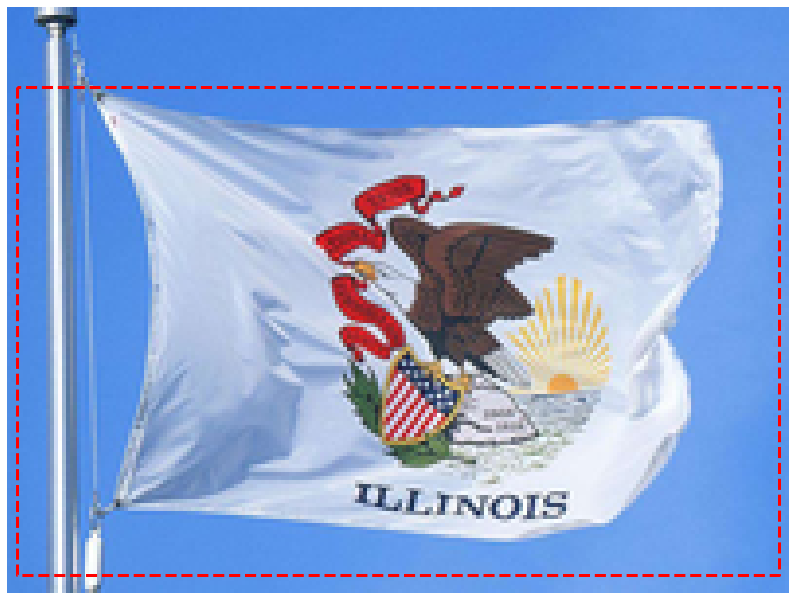

In [67]:
x = 2
y = 20
width = 195
height = 125

# x = 0
# y = 0
# width = 199
# height = 149

points = rectangle_points(x,y,width = width, height = height, resolution = 100)
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

In [68]:
round(min([height, width]) / 4)

31

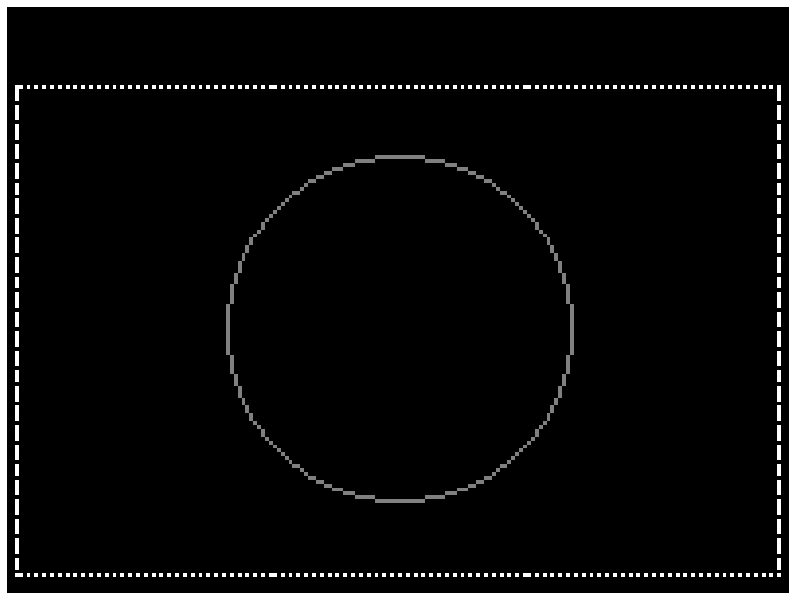

In [69]:
image_labels = np.zeros(image_gray.shape, dtype=np.uint8)

radius = round(min([height, width]) * 0.35)
indices = draw.circle_perimeter(y + round((height)/2), x + round((width)/2),radius)
image_labels[indices] = 1
image_labels[points[:, 1].astype(np.int), points[:, 0].astype(np.int)] = 2
image_show(image_labels);

<ipython-input-70-f4900012509c>:1: UserWarning: The probability range is outside [0, 1] given the tolerance `prob_tol`. Consider decreasing `beta` and/or decreasing `tol`.
  image_segmented = seg.random_walker(image_gray, image_labels, beta = 4000, )


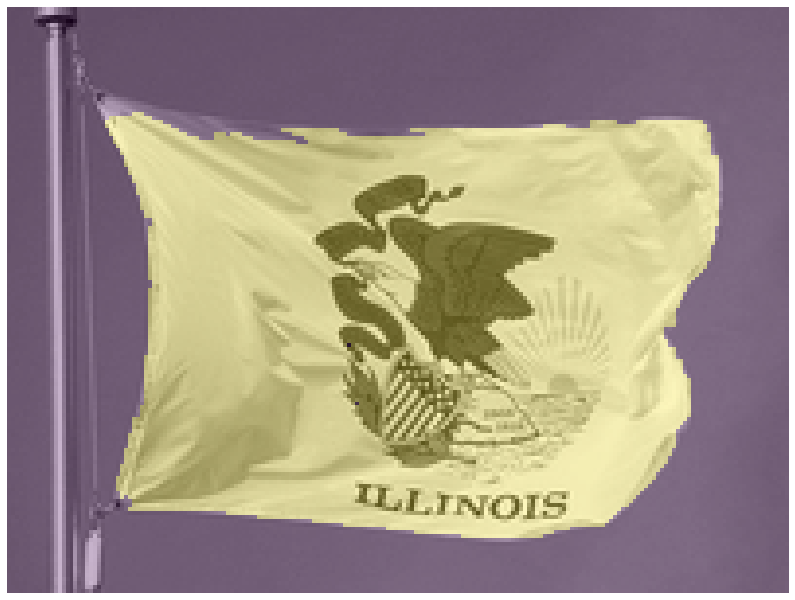

In [70]:
image_segmented = seg.random_walker(image_gray, image_labels, beta = 4000, )

fig, ax = image_show(image_gray)
ax.imshow(image_segmented == 1, alpha=0.3);

In [71]:
# image_2 = image

In [72]:
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image_segmented[i,j] != 1:
            image[i, j] = np.array([255,255,255])

(<Figure size 1008x1008 with 1 Axes>, <AxesSubplot:>)

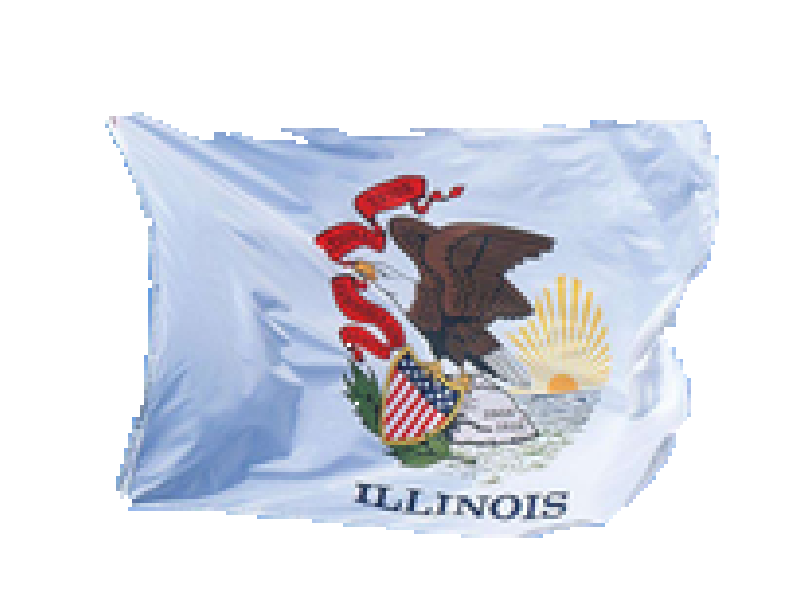

In [73]:
image_show(image)

In [41]:
io.imsave('illinois_test.png', image)